In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

#ignore warnings
warnings.filterwarnings('ignore')

In [2]:
train_data = pd.read_csv("Data/train.csv")
test_data = pd.read_csv("Data/test.csv")

In [3]:
train_data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,Gas

In [4]:
train_data.shape

(1460, 81)

In [5]:
train_data.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [6]:
#maybe drop PoolQC, MiscFeature, Fence, Alley and FireplaceQu
#reason: a lot of nan values
#let's check the column types

train_data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [7]:
'''
numerical features = Id, MSSubClass, LotFrontage, LotArea, OverallQual, OverallCond,
                     YearBuilt, YearRemodAdd, MasVnrArea, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, 
                     BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, 
                     BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd, Fireplaces, 
                     GarageYrBlt, GarageCars, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, 
                     ScreenPorch, PoolArea, MiscVal, MoSold, YrSold, SalePrice

categorical features = MSZoning, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, 
                       Neighborhood, Condition1, Condition2, RoofStyle, RoofMatl, Exterior1st, Exterior2nd,
                       MasVnrType, ExterQual, ExterCond, Foundation, BsmtQual,
                       BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, Heating, HeatingQC, CentralAir,
                       Electrical, KitchenQual, Functional, FireplaceQu, GarageType, GarageFinish, GarageQual,
                       GarageCond, PavedDrive, PoolQC, Fence, MiscFeature, SaleType, SaleCondition
                       
alpha numeric features = BidgType, HouseStyle
'''

'\nnumerical features = Id, MSSubClass, LotFrontage, LotArea, OverallQual, OverallCond,\n                     YearBuilt, YearRemodAdd, MasVnrArea, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, \n                     BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, \n                     BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd, Fireplaces, \n                     GarageYrBlt, GarageCars, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, \n                     ScreenPorch, PoolArea, MiscVal, MoSold, YrSold, SalePrice\n\ncategorical features = MSZoning, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, \n                       Neighborhood, Condition1, Condition2, RoofStyle, RoofMatl, Exterior1st, Exterior2nd,\n                       MasVnrType, ExterQual, ExterCond, Foundation, BsmtQual,\n                       BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, Heating, HeatingQC, CentralAir,\n

In [8]:
train_data.describe(include="all")

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460,1460,1460,1452,1452.000000,1460,1460,1460,1423,1423,1422,1423,1460.000000,1422,1460.000000,1460.000000,1460.000000,1460,1460,1460,1459,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460.000000,1460,1460.000000,770,1379,1379.000000,1379,1460.000000,1460.000000,1379,1379,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,5,3,25,9,8,5,8,NaN,NaN,NaN,NaN,6,8,15,16,4,NaN,4,5,6,4,4,4,6,NaN,6,NaN,NaN,NaN,6,5,2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,7,NaN,5,6,NaN,3,NaN,NaN,5,5,3,NaN,NaN,NaN,NaN,NaN,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,NaN,NaN,NaN,NaN,Gable,CompShg,VinylSd,VinylSd,None,NaN,TA,TA,PConc,TA,TA,No,Unf,NaN,Unf,NaN,NaN,NaN,GasA,Ex,Y,SBrkr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TA,NaN,Typ,NaN,Gd,Attchd,NaN,Unf,NaN,NaN,TA,TA,Y,NaN,NaN,NaN,NaN,NaN,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,NaN,NaN,NaN,NaN,1141,1434,515,504,864,NaN,906,1282,647,649,1311,953,430,NaN,1256,NaN,NaN,NaN,1428,741,1365,1334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,735,NaN,1360,NaN,380,870,NaN,605,NaN,NaN,1311,1326,1340,NaN,NaN,NaN,NaN,NaN,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.099315,5.575342,1971.267808,1984.865753,NaN,NaN,NaN,NaN,NaN,103.685262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,443.639726,NaN,46.549315,567.240411,1057.429452,NaN,NaN,NaN,NaN,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,NaN,6.517808,NaN,0.613014,NaN,NaN,1978.506164,NaN,1.767123,472.980137,NaN,NaN,NaN,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.382997,1.112799,30.202904,20.645407,NaN,NaN,NaN,NaN,NaN,181.066207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,456.098091,NaN,161.319273,441.866955,438.705324,NaN,NaN,NaN,NaN,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,NaN,1.625393,NaN,0.644666,NaN,NaN,24.689725,NaN,0.747315,213.804841,NaN,NaN,NaN,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1872.000000,1950.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,2.000000,NaN,0.000000,NaN,NaN,1900.000000,NaN

<AxesSubplot:>

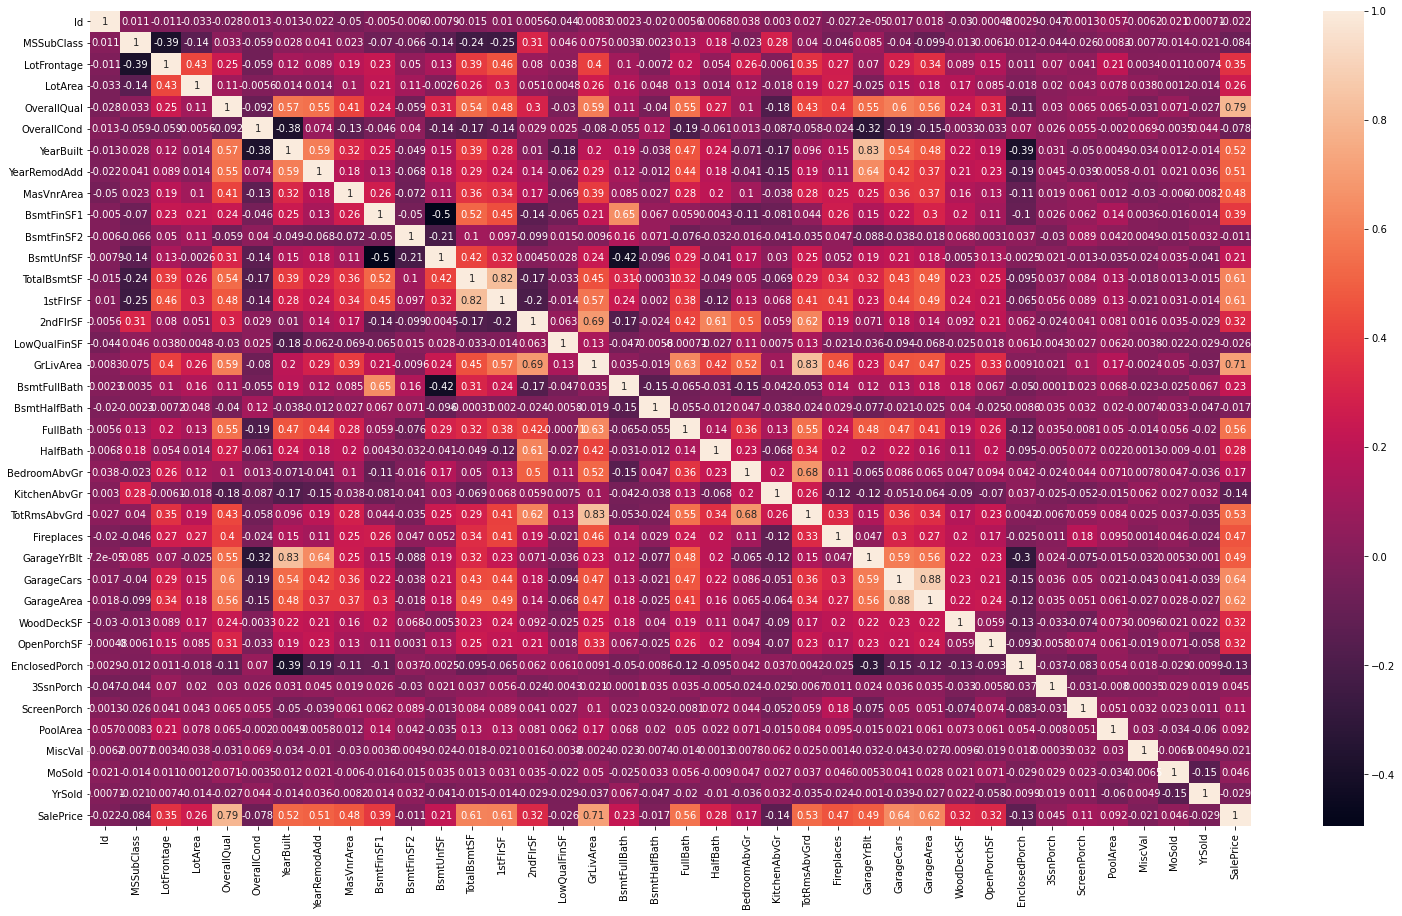

In [9]:
plt.figure(figsize=(26, 15))
sns.heatmap(train_data.corr(), annot=True)

In [10]:
train_data.drop(columns=['Id', 'PoolQC', 'MiscFeature', 'Fence', 'Alley', 'FireplaceQu'], inplace=True)

houses_id = test_data['Id']
test_data.drop(columns=['Id', 'PoolQC', 'MiscFeature', 'Fence', 'Alley', 'FireplaceQu'], inplace=True)

### MSZoning

In [11]:
train_data['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

Text(0.5, 1.0, 'Unique values MSZoning')

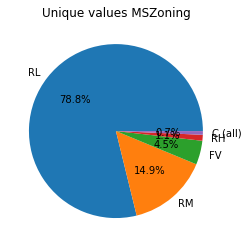

In [12]:
plt.pie(train_data['MSZoning'].value_counts(),
        labels=train_data['MSZoning'].value_counts().index,
        autopct="%1.1f%%")
plt.title("Unique values MSZoning")

In [13]:
#mapping the column

map_column = {
    'RL': 0,
    'RM': 1,
    'FV': 2,
    'RH': 3,
    'C (all)': 4
}

train_data['MSZoning'].replace(map_column, inplace = True)
test_data['MSZoning'].replace(map_column, inplace = True)

### LotFrontage

In [14]:
train_data['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [15]:
train_data['LotFrontage'].fillna(train_data['LotFrontage'].median(), inplace=True)
test_data['LotFrontage'].fillna(test_data['LotFrontage'].median(), inplace=True)

<AxesSubplot:xlabel='LotFrontage'>

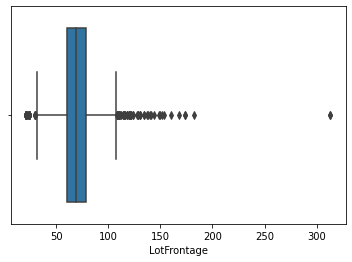

In [16]:
sns.boxplot(train_data['LotFrontage'])

### Street

Text(0.5, 1.0, 'Unique values Street')

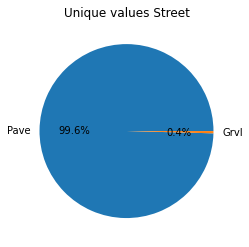

In [17]:
plt.pie(train_data['Street'].value_counts(),
        labels=train_data['Street'].value_counts().index,
        autopct="%1.1f%%")
plt.title("Unique values Street")

In [18]:
#mapping the column

map_column = {
    'Pave': 0,
    'Grvl': 1
}

train_data['Street'].replace(map_column, inplace = True)
test_data['Street'].replace(map_column, inplace = True)

### LotShape

Text(0.5, 1.0, 'Unique values LotShape')

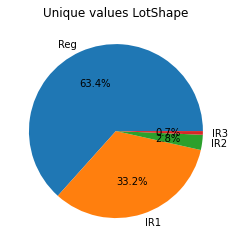

In [19]:
plt.pie(train_data['LotShape'].value_counts(),
        labels=train_data['LotShape'].value_counts().index,
        autopct="%1.1f%%")
plt.title("Unique values LotShape")

In [20]:
#mapping the column

map_column = {
    'Reg': 0,
    'IR1': 1,
    'IR2': 2,
    'IR3': 3
}

train_data['LotShape'].replace(map_column, inplace = True)
test_data['LotShape'].replace(map_column, inplace = True)

### LandContour

Text(0.5, 1.0, 'Unique values LandContour')

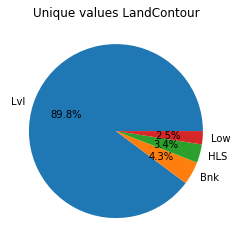

In [21]:
plt.pie(train_data['LandContour'].value_counts(),
        labels=train_data['LandContour'].value_counts().index,
        autopct="%1.1f%%")
plt.title("Unique values LandContour")

In [22]:
#mapping the column

map_column = {
    'Lvl': 0,
    'Bnk': 1,
    'HLS': 2,
    'Low': 3
}

train_data['LandContour'].replace(map_column, inplace = True)
test_data['LandContour'].replace(map_column, inplace = True)

### Utilities

Text(0.5, 1.0, 'Unique values Utilities')

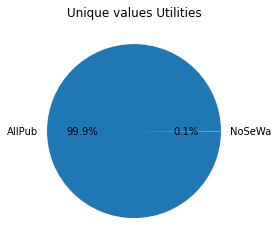

In [23]:
plt.pie(train_data['Utilities'].value_counts(),
        labels=train_data['Utilities'].value_counts().index,
        autopct="%1.1f%%")
plt.title("Unique values Utilities")

In [24]:
#mapping the column

map_column = {
    'AllPub': 0,
    'NoSeWa': 1
}

train_data['Utilities'].replace(map_column, inplace = True)
test_data['Utilities'].replace(map_column, inplace = True)

### LotConfig

Text(0.5, 1.0, 'Unique values LotConfig')

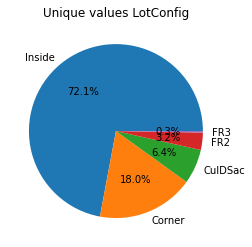

In [25]:
plt.pie(train_data['LotConfig'].value_counts(),
        labels=train_data['LotConfig'].value_counts().index,
        autopct="%1.1f%%")
plt.title("Unique values LotConfig")

In [26]:
#mapping the column

map_column = {
    'Inside': 0,
    'Corner': 1,
    'CulDSac': 2,
    'FR2': 3,
    'FR3': 4
}

train_data['LotConfig'].replace(map_column, inplace = True)
test_data['LotConfig'].replace(map_column, inplace = True)

### LandSlope

Text(0.5, 1.0, 'Unique values LandSlope')

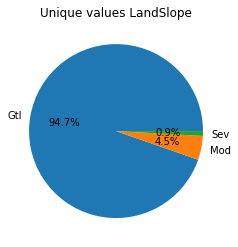

In [27]:
plt.pie(train_data['LandSlope'].value_counts(),
        labels=train_data['LandSlope'].value_counts().index,
        autopct="%1.1f%%")
plt.title("Unique values LandSlope")

In [28]:
#mapping the column

map_column = {
    'Gtl': 0,
    'Mod': 1,
    'Sev': 2
}

train_data['LandSlope'].replace(map_column, inplace = True)
test_data['LandSlope'].replace(map_column, inplace = True)

### Neighborhood

Text(0.5, 1.0, 'Unique values Neighborhood')

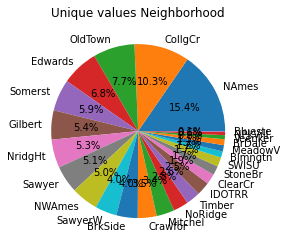

In [29]:
plt.pie(train_data['Neighborhood'].value_counts(),
        labels=train_data['Neighborhood'].value_counts().index,
        autopct="%1.1f%%")
plt.title("Unique values Neighborhood")

In [30]:
train_data['Neighborhood'].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [31]:
#mapping the column

map_column = {
    'NAmes': 0,
    'CollgCr': 1,
    'OldTown': 2,
    'Edwards': 3,
    'Somerst': 4,
    'Gilbert': 5,
    'NridgHt': 6,
    'Sawyer': 7,
    'NWAmes': 8,
    'SawyerW': 9,
    'BrkSide': 10,
    'Crawfor': 11,
    'Mitchel': 12,
    'NoRidge': 13,
    'Timber': 14,
    'IDOTRR': 15,
    'ClearCr': 16,
    'SWISU': 17,
    'StoneBr': 18,
    'MeadowV': 19,
    'Blmngtn': 20,
    'BrDale': 21,
    'Veenker': 22,
    'NPkVill': 23,
    'Blueste': 24
}

train_data['Neighborhood'].replace(map_column, inplace = True)
test_data['Neighborhood'].replace(map_column, inplace = True)

### Condition1

Text(0.5, 1.0, 'Unique values Condition1')

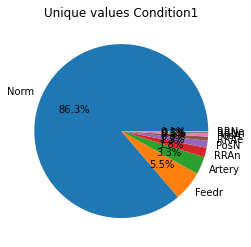

In [32]:
plt.pie(train_data['Condition1'].value_counts(),
        labels=train_data['Condition1'].value_counts().index,
        autopct="%1.1f%%")
plt.title("Unique values Condition1")

In [33]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
train_data['Condition1'] = label_encoder.fit_transform(train_data['Condition1'])
test_data['Condition1'] = label_encoder.fit_transform(test_data['Condition1'])

### Condition2

Text(0.5, 1.0, 'Unique values Condition2')

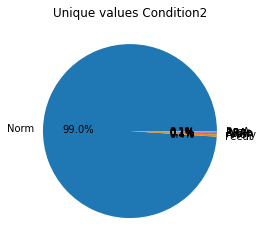

In [34]:
plt.pie(train_data['Condition2'].value_counts(),
        labels=train_data['Condition2'].value_counts().index,
        autopct="%1.1f%%")
plt.title("Unique values Condition2")

In [35]:
train_data['Condition2'].value_counts()

Norm      1445
Feedr        6
Artery       2
PosN         2
RRNn         2
RRAn         1
RRAe         1
PosA         1
Name: Condition2, dtype: int64

In [36]:
train_data['Condition2'] = train_data['Condition2'].replace(['Feedr', 'Artery', 'PosN', 'RRNn', 'RRAe', 'RRAn', 'PosA'], 'Not_Norm')
test_data['Condition2'] = test_data['Condition2'].replace(['Feedr', 'Artery', 'PosN', 'RRNn', 'RRAe', 'RRAn', 'PosA'], 'Not_Norm')

In [37]:
train_data['Condition2'].value_counts()

Norm        1445
Not_Norm      15
Name: Condition2, dtype: int64

In [38]:
label_encoder = LabelEncoder()
train_data['Condition2'] = label_encoder.fit_transform(train_data['Condition2'])
test_data['Condition2'] = label_encoder.fit_transform(test_data['Condition2'])

### BldgType

Text(0.5, 1.0, 'Unique values BldgType')

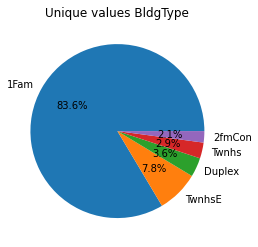

In [39]:
plt.pie(train_data['BldgType'].value_counts(),
        labels=train_data['BldgType'].value_counts().index,
        autopct="%1.1f%%")
plt.title("Unique values BldgType")

In [40]:
label_encoder = LabelEncoder()
train_data['BldgType'] = label_encoder.fit_transform(train_data['BldgType'])
test_data['BldgType'] = label_encoder.fit_transform(test_data['BldgType'])

### HouseStyle

Text(0.5, 1.0, 'Unique values HouseStyle')

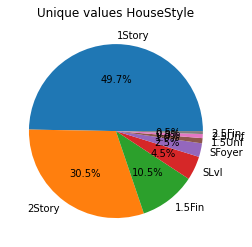

In [41]:
plt.pie(train_data['HouseStyle'].value_counts(),
        labels=train_data['HouseStyle'].value_counts().index,
        autopct="%1.1f%%")
plt.title("Unique values HouseStyle")

In [42]:
label_encoder = LabelEncoder()
train_data['HouseStyle'] = label_encoder.fit_transform(train_data['HouseStyle'])
test_data['HouseStyle'] = label_encoder.fit_transform(test_data['HouseStyle'])

### RoofStyle

Text(0.5, 1.0, 'Unique values RoofStyle')

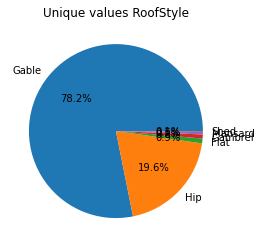

In [43]:
plt.pie(train_data['RoofStyle'].value_counts(),
        labels=train_data['RoofStyle'].value_counts().index,
        autopct="%1.1f%%")
plt.title("Unique values RoofStyle")

In [44]:
label_encoder = LabelEncoder()
train_data['RoofStyle'] = label_encoder.fit_transform(train_data['RoofStyle'])
test_data['RoofStyle'] = label_encoder.fit_transform(test_data['RoofStyle'])

### RoofMatl

Text(0.5, 1.0, 'Unique values RoofMatl')

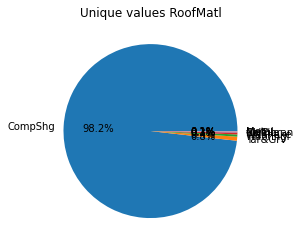

In [45]:
plt.pie(train_data['RoofMatl'].value_counts(),
        labels=train_data['RoofMatl'].value_counts().index,
        autopct="%1.1f%%")
plt.title("Unique values RoofMatl")

In [46]:
label_encoder = LabelEncoder()
train_data['RoofMatl'] = label_encoder.fit_transform(train_data['RoofMatl'])
test_data['RoofMatl'] = label_encoder.fit_transform(test_data['RoofMatl'])

### Exterior1st

Text(0.5, 1.0, 'Unique values Exterior1st')

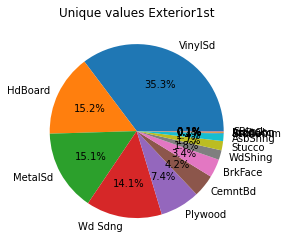

In [47]:
plt.pie(train_data['Exterior1st'].value_counts(),
        labels=train_data['Exterior1st'].value_counts().index,
        autopct="%1.1f%%")
plt.title("Unique values Exterior1st")

In [48]:
label_encoder = LabelEncoder()
train_data['Exterior1st'] = label_encoder.fit_transform(train_data['Exterior1st'])
test_data['Exterior1st'] = label_encoder.fit_transform(test_data['Exterior1st'])

### Exterior2nd

Text(0.5, 1.0, 'Unique values Exterior2nd')

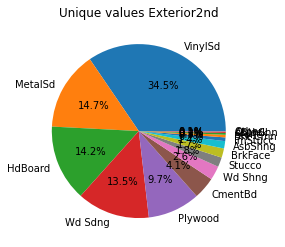

In [49]:
plt.pie(train_data['Exterior2nd'].value_counts(),
        labels=train_data['Exterior2nd'].value_counts().index,
        autopct="%1.1f%%")
plt.title("Unique values Exterior2nd")

In [50]:
label_encoder = LabelEncoder()
train_data['Exterior2nd'] = label_encoder.fit_transform(train_data['Exterior2nd'])
test_data['Exterior2nd'] = label_encoder.fit_transform(test_data['Exterior2nd'])

### MasVnrType

Text(0.5, 1.0, 'Unique values MasVnrType')

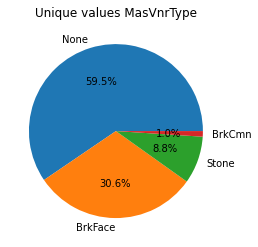

In [51]:
plt.pie(train_data['MasVnrType'].value_counts(),
        labels=train_data['MasVnrType'].value_counts().index,
        autopct="%1.1f%%")
plt.title("Unique values MasVnrType")

In [52]:
train_data['MasVnrType'].fillna(train_data['MasVnrType'].mode(), inplace=True)
test_data['MasVnrType'].fillna(test_data['MasVnrType'].mode(), inplace=True)

In [53]:
label_encoder = LabelEncoder()
train_data['MasVnrType'] = label_encoder.fit_transform(train_data['MasVnrType'])
test_data['MasVnrType'] = label_encoder.fit_transform(test_data['MasVnrType'])

### MasVnrArea

<AxesSubplot:xlabel='MasVnrArea'>

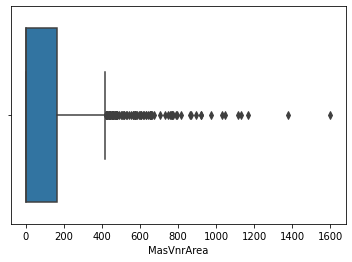

In [54]:
sns.boxplot(train_data['MasVnrArea'])

In [55]:
train_data['MasVnrArea'].fillna(train_data['MasVnrArea'].median(), inplace=True)
test_data['MasVnrArea'].fillna(test_data['MasVnrArea'].median(), inplace=True)

### ExterQual

Text(0.5, 1.0, 'Unique values ExterQual')

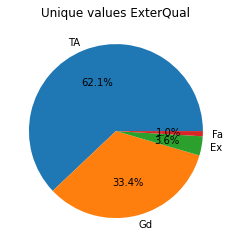

In [56]:
plt.pie(train_data['ExterQual'].value_counts(),
        labels=train_data['ExterQual'].value_counts().index,
        autopct="%1.1f%%")
plt.title("Unique values ExterQual")

In [57]:
label_encoder = LabelEncoder()
train_data['ExterQual'] = label_encoder.fit_transform(train_data['ExterQual'])
test_data['ExterQual'] = label_encoder.fit_transform(test_data['ExterQual'])

### ExterCond

Text(0.5, 1.0, 'Unique values ExterCond')

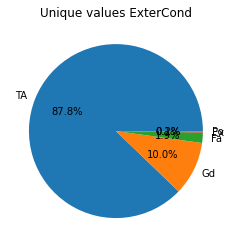

In [58]:
plt.pie(train_data['ExterCond'].value_counts(),
        labels=train_data['ExterCond'].value_counts().index,
        autopct="%1.1f%%")
plt.title("Unique values ExterCond")

In [59]:
label_encoder = LabelEncoder()
train_data['ExterCond'] = label_encoder.fit_transform(train_data['ExterCond'])
test_data['ExterCond'] = label_encoder.fit_transform(test_data['ExterCond'])

### Foundation

Text(0.5, 1.0, 'Unique values Foundation')

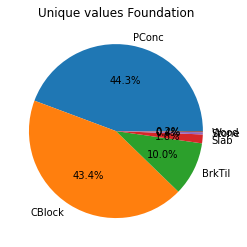

In [60]:
plt.pie(train_data['Foundation'].value_counts(),
        labels=train_data['Foundation'].value_counts().index,
        autopct="%1.1f%%")
plt.title("Unique values Foundation")

In [61]:
label_encoder = LabelEncoder()
train_data['Foundation'] = label_encoder.fit_transform(train_data['Foundation'])
test_data['Foundation'] = label_encoder.fit_transform(test_data['Foundation'])

### BsmtQual

Text(0.5, 1.0, 'Unique values BsmtQual')

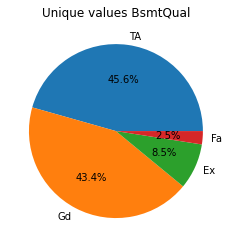

In [62]:
plt.pie(train_data['BsmtQual'].value_counts(),
        labels=train_data['BsmtQual'].value_counts().index,
        autopct="%1.1f%%")
plt.title("Unique values BsmtQual")

In [63]:
label_encoder = LabelEncoder()
train_data['BsmtQual'] = label_encoder.fit_transform(train_data['BsmtQual'])
test_data['BsmtQual'] = label_encoder.fit_transform(test_data['BsmtQual'])

### BsmtCond

Text(0.5, 1.0, 'Unique values BsmtCond')

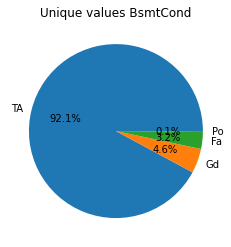

In [64]:
plt.pie(train_data['BsmtCond'].value_counts(),
        labels=train_data['BsmtCond'].value_counts().index,
        autopct="%1.1f%%")
plt.title("Unique values BsmtCond")

In [65]:
label_encoder = LabelEncoder()
train_data['BsmtCond'] = label_encoder.fit_transform(train_data['BsmtCond'])
test_data['BsmtCond'] = label_encoder.fit_transform(test_data['BsmtCond'])

### BsmtExposure

Text(0.5, 1.0, 'Unique values BsmtExposure')

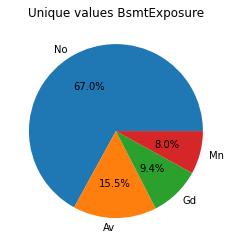

In [66]:
plt.pie(train_data['BsmtExposure'].value_counts(),
        labels=train_data['BsmtExposure'].value_counts().index,
        autopct="%1.1f%%")
plt.title("Unique values BsmtExposure")

In [67]:
label_encoder = LabelEncoder()
train_data['BsmtExposure'] = label_encoder.fit_transform(train_data['BsmtExposure'])
test_data['BsmtExposure'] = label_encoder.fit_transform(test_data['BsmtExposure'])

### BsmtFinType1

Text(0.5, 1.0, 'Unique values BsmtFinType1')

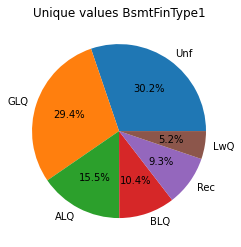

In [68]:
plt.pie(train_data['BsmtFinType1'].value_counts(),
        labels=train_data['BsmtFinType1'].value_counts().index,
        autopct="%1.1f%%")
plt.title("Unique values BsmtFinType1")

In [69]:
label_encoder = LabelEncoder()
train_data['BsmtFinType1'] = label_encoder.fit_transform(train_data['BsmtFinType1'])
test_data['BsmtFinType1'] = label_encoder.fit_transform(test_data['BsmtFinType1'])

### BsmtFinType2

Text(0.5, 1.0, 'Unique values BsmtFinType2')

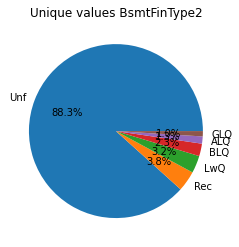

In [70]:
plt.pie(train_data['BsmtFinType2'].value_counts(),
        labels=train_data['BsmtFinType2'].value_counts().index,
        autopct="%1.1f%%")
plt.title("Unique values BsmtFinType2")

In [71]:
train_data['BsmtFinType2'].fillna(train_data['BsmtFinType2'].mode(), inplace=True)
test_data['BsmtFinType2'].fillna(test_data['BsmtFinType2'].mode(), inplace=True)

In [72]:
label_encoder = LabelEncoder()
train_data['BsmtFinType2'] = label_encoder.fit_transform(train_data['BsmtFinType2'])
test_data['BsmtFinType2'] = label_encoder.fit_transform(test_data['BsmtFinType2'])

### Heating

Text(0.5, 1.0, 'Unique values Heating')

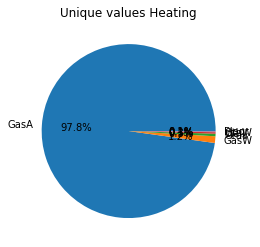

In [73]:
plt.pie(train_data['Heating'].value_counts(),
        labels=train_data['Heating'].value_counts().index,
        autopct="%1.1f%%")
plt.title("Unique values Heating")

In [74]:
train_data['Heating'].value_counts()

GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64

In [75]:
train_data['Heating'] = train_data['Heating'].replace(['GasW', 'Grav', 'Wall', 'OthW', 'Floor'], 'Not_GasA')
test_data['Heating'] = test_data['Heating'].replace(['GasW', 'Grav', 'Wall', 'OthW', 'Floor'], 'Not_GasA')

In [76]:
train_data['Heating'].fillna(train_data['Heating'].mode(), inplace=True)
test_data['Heating'].fillna(test_data['Heating'].mode(), inplace=True)

In [77]:
label_encoder = LabelEncoder()
train_data['Heating'] = label_encoder.fit_transform(train_data['Heating'])
test_data['Heating'] = label_encoder.fit_transform(test_data['Heating'])

### HeatingQC

Text(0.5, 1.0, 'Unique values HeatingQC')

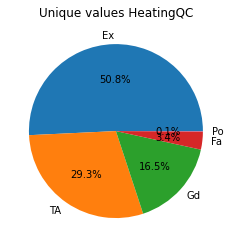

In [78]:
plt.pie(train_data['HeatingQC'].value_counts(),
        labels=train_data['HeatingQC'].value_counts().index,
        autopct="%1.1f%%")
plt.title("Unique values HeatingQC")

In [79]:
train_data['HeatingQC'].fillna(train_data['HeatingQC'].mode(), inplace=True)
test_data['HeatingQC'].fillna(test_data['HeatingQC'].mode(), inplace=True)

In [80]:
label_encoder = LabelEncoder()
train_data['HeatingQC'] = label_encoder.fit_transform(train_data['HeatingQC'])
test_data['HeatingQC'] = label_encoder.fit_transform(test_data['HeatingQC'])

### CentralAir

Text(0.5, 1.0, 'Unique values CentralAir')

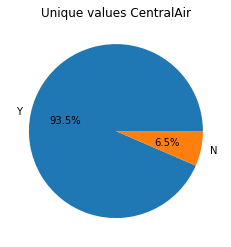

In [81]:
plt.pie(train_data['CentralAir'].value_counts(),
        labels=train_data['CentralAir'].value_counts().index,
        autopct="%1.1f%%")
plt.title("Unique values CentralAir")

In [82]:
label_encoder = LabelEncoder()
train_data['CentralAir'] = label_encoder.fit_transform(train_data['CentralAir'])
test_data['CentralAir'] = label_encoder.fit_transform(test_data['CentralAir'])

### Electrical

Text(0.5, 1.0, 'Unique values Electrical')

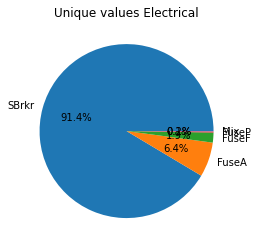

In [83]:
plt.pie(train_data['Electrical'].value_counts(),
        labels=train_data['Electrical'].value_counts().index,
        autopct="%1.1f%%")
plt.title("Unique values Electrical")

In [84]:
train_data['Electrical'].fillna(train_data['Electrical'].mode(), inplace=True)
test_data['Electrical'].fillna(test_data['Electrical'].mode(), inplace=True)

In [85]:
label_encoder = LabelEncoder()
train_data['Electrical'] = label_encoder.fit_transform(train_data['Electrical'])
test_data['Electrical'] = label_encoder.fit_transform(test_data['Electrical'])

### KitchenQual 

Text(0.5, 1.0, 'Unique values KitchenQual')

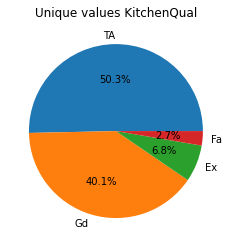

In [86]:
plt.pie(train_data['KitchenQual'].value_counts(),
        labels=train_data['KitchenQual'].value_counts().index,
        autopct="%1.1f%%")
plt.title("Unique values KitchenQual")

In [87]:
label_encoder = LabelEncoder()
train_data['KitchenQual'] = label_encoder.fit_transform(train_data['KitchenQual'])
test_data['KitchenQual'] = label_encoder.fit_transform(test_data['KitchenQual'])

### Functional

Text(0.5, 1.0, 'Unique values Functional')

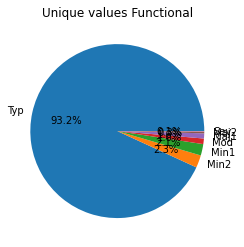

In [88]:
plt.pie(train_data['Functional'].value_counts(),
        labels=train_data['Functional'].value_counts().index,
        autopct="%1.1f%%")
plt.title("Unique values Functional")

In [89]:
label_encoder = LabelEncoder()
train_data['Functional'] = label_encoder.fit_transform(train_data['Functional'])
test_data['Functional'] = label_encoder.fit_transform(test_data['Functional'])

### GarageType

Text(0.5, 1.0, 'Unique values GarageType')

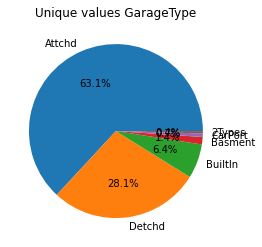

In [90]:
plt.pie(train_data['GarageType'].value_counts(),
        labels=train_data['GarageType'].value_counts().index,
        autopct="%1.1f%%")
plt.title("Unique values GarageType")

In [91]:
train_data['GarageType'].fillna(train_data['GarageType'].mode(), inplace=True)
test_data['GarageType'].fillna(test_data['GarageType'].mode(), inplace=True)

In [92]:
label_encoder = LabelEncoder()
train_data['GarageType'] = label_encoder.fit_transform(train_data['GarageType'])
test_data['GarageType'] = label_encoder.fit_transform(test_data['GarageType'])

### GarageFinish

Text(0.5, 1.0, 'Unique values GarageFinish')

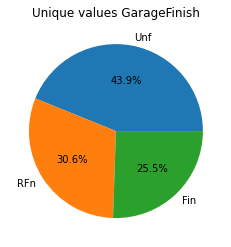

In [93]:
plt.pie(train_data['GarageFinish'].value_counts(),
        labels=train_data['GarageFinish'].value_counts().index,
        autopct="%1.1f%%")
plt.title("Unique values GarageFinish")

In [94]:
train_data['GarageFinish'].fillna(train_data['GarageFinish'].mode(), inplace=True)
test_data['GarageFinish'].fillna(test_data['GarageFinish'].mode(), inplace=True)

In [95]:
label_encoder = LabelEncoder()
train_data['GarageFinish'] = label_encoder.fit_transform(train_data['GarageFinish'])
test_data['GarageFinish'] = label_encoder.fit_transform(test_data['GarageFinish'])

### GarageQual

Text(0.5, 1.0, 'Unique values GarageQual')

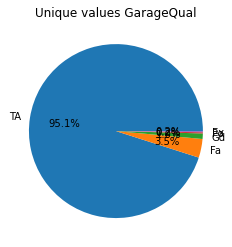

In [96]:
plt.pie(train_data['GarageQual'].value_counts(),
        labels=train_data['GarageQual'].value_counts().index,
        autopct="%1.1f%%")
plt.title("Unique values GarageQual")

In [97]:
train_data['GarageQual'].fillna(train_data['GarageQual'].mode(), inplace=True)
test_data['GarageQual'].fillna(test_data['GarageQual'].mode(), inplace=True)

In [98]:
train_data['GarageQual'] = train_data['GarageQual'].replace(['Fa', 'Gd', 'Po', 'Ex'], 'Not_TA')
test_data['GarageQual'] = test_data['GarageQual'].replace(['Fa', 'Gd', 'Po', 'Ex'], 'Not_TA')

In [99]:
label_encoder = LabelEncoder()
train_data['GarageQual'] = label_encoder.fit_transform(train_data['GarageQual'])
test_data['GarageQual'] = label_encoder.fit_transform(test_data['GarageQual'])

### GarageCond

Text(0.5, 1.0, 'Unique values GarageCond')

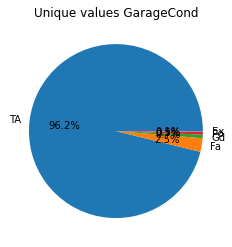

In [100]:
plt.pie(train_data['GarageCond'].value_counts(),
        labels=train_data['GarageCond'].value_counts().index,
        autopct="%1.1f%%")
plt.title("Unique values GarageCond")

In [101]:
train_data['GarageCond'] = train_data['GarageCond'].replace(['Fa', 'Gd', 'Po', 'Ex'], 'Not_TA')
test_data['GarageCond'] = test_data['GarageCond'].replace(['Fa', 'Gd', 'Po', 'Ex'], 'Not_TA')

In [102]:
label_encoder = LabelEncoder()
train_data['GarageCond'] = label_encoder.fit_transform(train_data['GarageCond'])
test_data['GarageCond'] = label_encoder.fit_transform(test_data['GarageCond'])

### PavedDrive

Text(0.5, 1.0, 'Unique values PavedDrive')

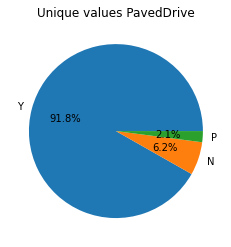

In [103]:
plt.pie(train_data['PavedDrive'].value_counts(),
        labels=train_data['PavedDrive'].value_counts().index,
        autopct="%1.1f%%")
plt.title("Unique values PavedDrive")

In [104]:
label_encoder = LabelEncoder()
train_data['PavedDrive'] = label_encoder.fit_transform(train_data['PavedDrive'])
test_data['PavedDrive'] = label_encoder.fit_transform(test_data['PavedDrive'])

### SaleType

Text(0.5, 1.0, 'Unique values SaleType')

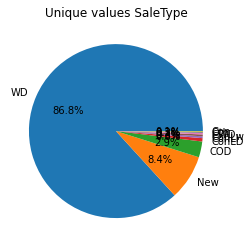

In [105]:
plt.pie(train_data['SaleType'].value_counts(),
        labels=train_data['SaleType'].value_counts().index,
        autopct="%1.1f%%")
plt.title("Unique values SaleType")

In [106]:
label_encoder = LabelEncoder()
train_data['SaleType'] = label_encoder.fit_transform(train_data['SaleType'])
test_data['SaleType'] = label_encoder.fit_transform(test_data['SaleType'])

### SaleCondition

Text(0.5, 1.0, 'Unique values SaleCondition')

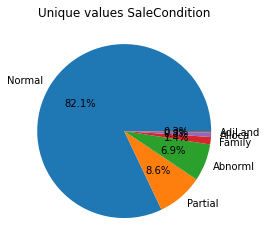

In [107]:
plt.pie(train_data['SaleCondition'].value_counts(),
        labels=train_data['SaleCondition'].value_counts().index,
        autopct="%1.1f%%")
plt.title("Unique values SaleCondition")

In [108]:
label_encoder = LabelEncoder()
train_data['SaleCondition'] = label_encoder.fit_transform(train_data['SaleCondition'])
test_data['SaleCondition'] = label_encoder.fit_transform(test_data['SaleCondition'])

In [109]:
train_data.dtypes

MSSubClass         int64
MSZoning           int64
LotFrontage      float64
LotArea            int64
Street             int64
LotShape           int64
LandContour        int64
Utilities          int64
LotConfig          int64
LandSlope          int64
Neighborhood       int64
Condition1         int64
Condition2         int64
BldgType           int64
HouseStyle         int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle          int64
RoofMatl           int64
Exterior1st        int64
Exterior2nd        int64
MasVnrType         int64
MasVnrArea       float64
ExterQual          int64
ExterCond          int64
Foundation         int64
BsmtQual           int64
BsmtCond           int64
BsmtExposure       int64
BsmtFinType1       int64
BsmtFinSF1         int64
BsmtFinType2       int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating            int64
HeatingQC          int64
CentralAir         int64


In [110]:
train_data.isnull().sum()

MSSubClass        0
MSZoning          0
LotFrontage       0
LotArea           0
Street            0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        0
MasVnrArea        0
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual          0
BsmtCond          0
BsmtExposure      0
BsmtFinType1      0
BsmtFinSF1        0
BsmtFinType2      0
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
Heating           0
HeatingQC         0
CentralAir        0
Electrical        0
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0
BedroomAbvGr      0


### GarageYrBlt

In [111]:
train_data['GarageYrBlt'].fillna(train_data['GarageYrBlt'].median(), inplace=True)
test_data['GarageYrBlt'].fillna(test_data['GarageYrBlt'].median(), inplace=True)

<AxesSubplot:>

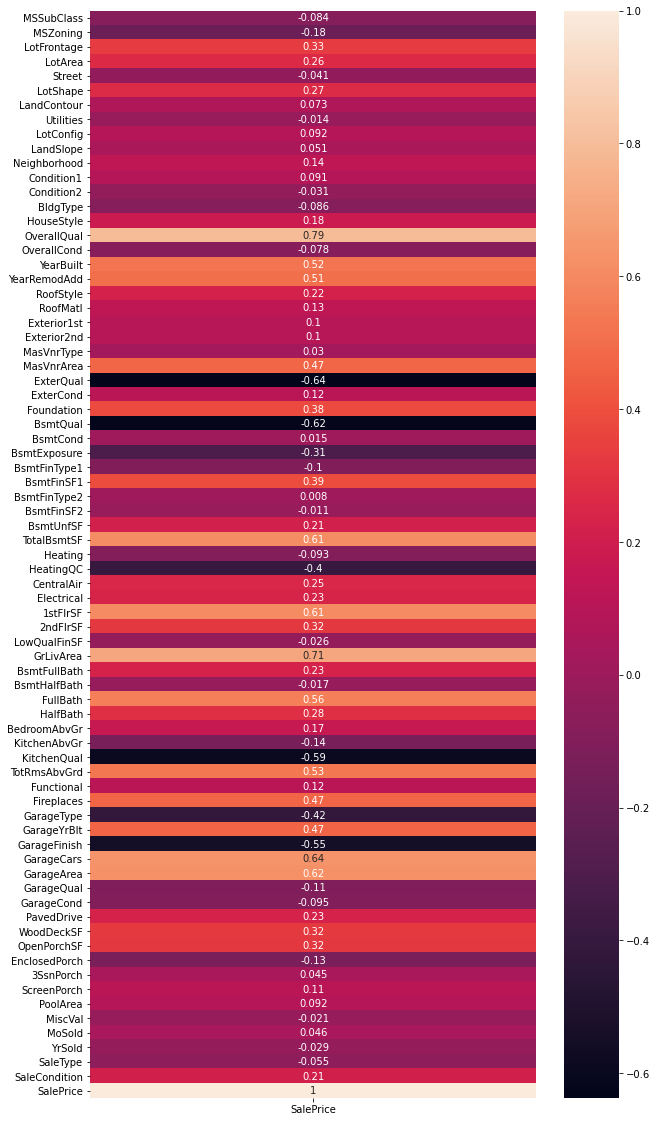

In [112]:
plt.figure(figsize=(10, 20))
corr = train_data.corr()

sns.heatmap(corr[['SalePrice']], annot=True)

In [113]:
test_data.dtypes

MSSubClass         int64
MSZoning         float64
LotFrontage      float64
LotArea            int64
Street             int64
LotShape           int64
LandContour        int64
Utilities        float64
LotConfig          int64
LandSlope          int64
Neighborhood       int64
Condition1         int64
Condition2         int64
BldgType           int64
HouseStyle         int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle          int64
RoofMatl           int64
Exterior1st        int64
Exterior2nd        int64
MasVnrType         int64
MasVnrArea       float64
ExterQual          int64
ExterCond          int64
Foundation         int64
BsmtQual           int64
BsmtCond           int64
BsmtExposure       int64
BsmtFinType1       int64
BsmtFinSF1       float64
BsmtFinType2       int64
BsmtFinSF2       float64
BsmtUnfSF        float64
TotalBsmtSF      float64
Heating            int64
HeatingQC          int64
CentralAir         int64


In [114]:
test_data.isnull().sum()

MSSubClass       0
MSZoning         4
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        2
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       1
BsmtFinType2     0
BsmtFinSF2       1
BsmtUnfSF        1
TotalBsmtSF      1
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     2
BsmtHalfBath     2
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd

In [115]:
#filling the rest of the nan values
test_data['MSZoning'].fillna(test_data['MSZoning'].mode()[0], inplace=True)
test_data['Utilities'].fillna(test_data['Utilities'].mode()[0], inplace=True)
test_data['GarageArea'].fillna(test_data['Utilities'].median(), inplace=True)
test_data['GarageCars'].fillna(test_data['GarageCars'].median(), inplace=True)
test_data['BsmtHalfBath'].fillna(test_data['Utilities'].median(), inplace=True)
test_data['BsmtFullBath'].fillna(test_data['GarageCars'].median(), inplace=True)
test_data['BsmtFinSF1'].fillna(test_data['BsmtFinSF1'].median(), inplace=True)
test_data['BsmtFinType2'].fillna(test_data['BsmtFinType2'].median(), inplace=True)
test_data['BsmtFinSF2'].fillna(test_data['BsmtFinSF2'].median(), inplace=True)
test_data['BsmtUnfSF'].fillna(test_data['BsmtUnfSF'].median(), inplace=True)
test_data['TotalBsmtSF'].fillna(test_data['TotalBsmtSF'].median(), inplace=True)

In [116]:
test_data.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd

In [117]:
from sklearn.model_selection import train_test_split

X = train_data.drop(columns=['SalePrice'])
y = train_data['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

## Feature Selection

### Random Forest

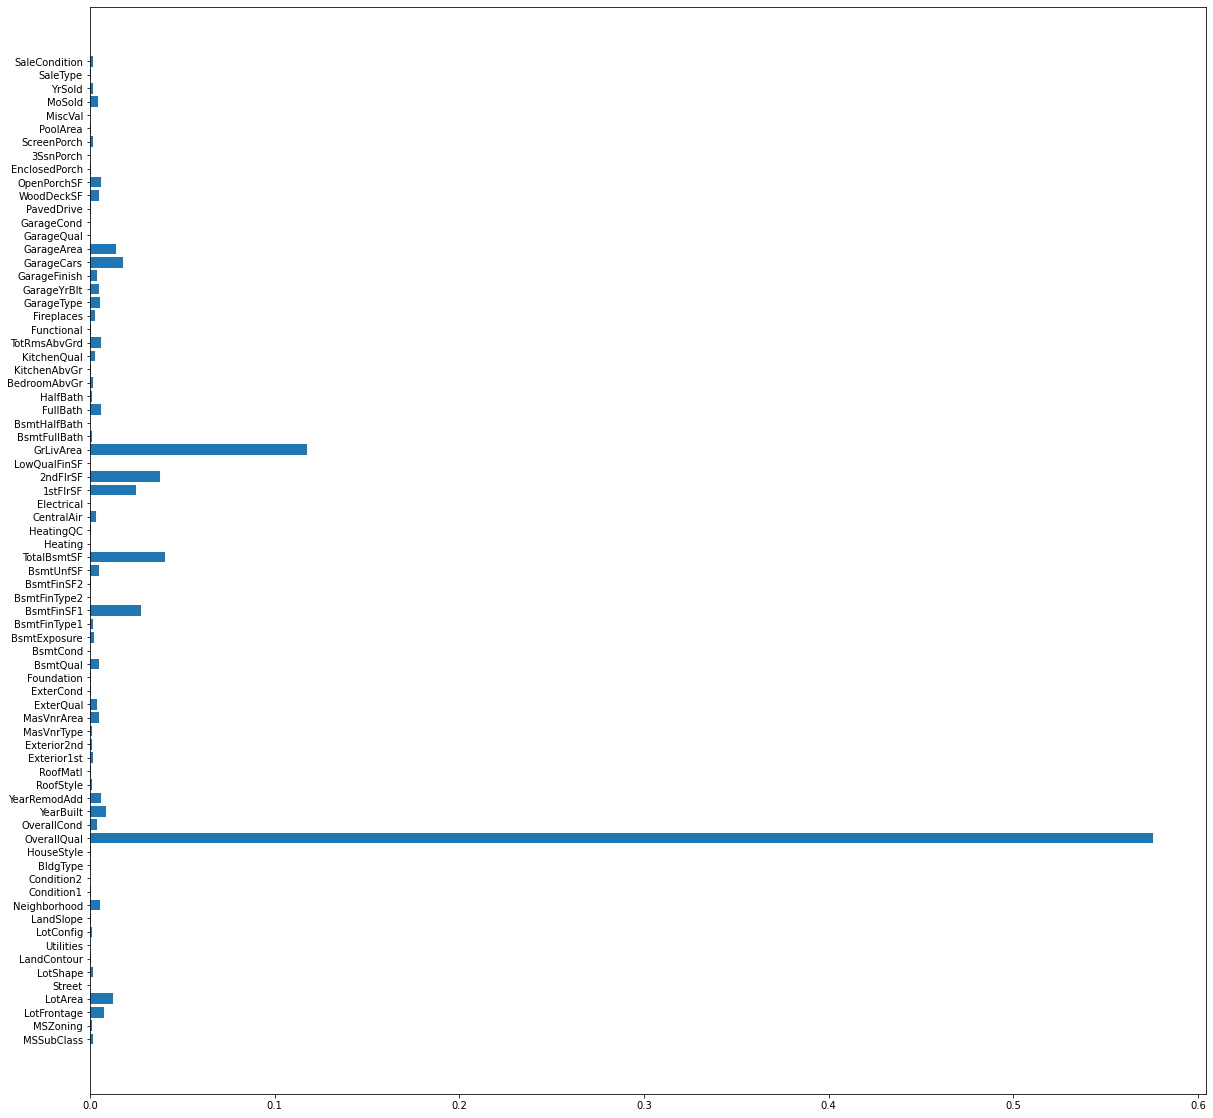

'\nfeatures to use:\noverallqual, grlivarea, totalbsmtsf, 2ndflrsf, 1stflrsf, bsmtfinsf1, garagecars, garagearea, garagetyepe,\ntotrmsabvgrd, lotarea, yearbuilt\n'

In [118]:
from sklearn.ensemble import RandomForestRegressor

random_forest = RandomForestRegressor(n_jobs=-1, random_state=19)

random_forest.fit(X, y)
feature_importances = random_forest.feature_importances_
columns = X.columns

plt.figure(figsize=(20, 20))
plt.barh(columns, feature_importances)
plt.show()

'''
features to use:
overallqual, grlivarea, totalbsmtsf, 2ndflrsf, 1stflrsf, bsmtfinsf1, garagecars, garagearea, garagetyepe,
totrmsabvgrd, lotarea, yearbuilt
'''

### RFE

In [119]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

rfe_selector = RFE(estimator=LogisticRegression(random_state=19), n_features_to_select=12, step=10, verbose=5)
rfe_selector.fit(X, y)
rfe_support = rfe_selector.get_support()
rfe_feature = X.loc[:,rfe_support].columns.tolist()

rfe_feature

Fitting estimator with 74 features.
Fitting estimator with 64 features.
Fitting estimator with 54 features.
Fitting estimator with 44 features.
Fitting estimator with 34 features.
Fitting estimator with 24 features.
Fitting estimator with 14 features.


['LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageYrBlt',
 'MiscVal',
 'YrSold']

### Lasso

In [120]:
from sklearn.feature_selection import SelectFromModel

lasso_randomforest = SelectFromModel(RandomForestRegressor(random_state=19), max_features = 12)

lasso_randomforest.fit(X, y)
lasso_randomforest_support = lasso_randomforest.get_support()
lasso_randomforest_feature = X.loc[:, lasso_randomforest_support].columns.tolist()

lasso_randomforest_feature

['OverallQual',
 'BsmtFinSF1',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageCars',
 'GarageArea']

### LGBMClassifier

In [121]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier()

lgbm_feature = SelectFromModel(lgbm, max_features = 12)

lgbm_feature.fit(X, y)
lgbm_feature_support = rfe_selector.get_support()
lgbm_feature = X.loc[:, lgbm_feature_support].columns.tolist()

lgbm_feature

['LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageYrBlt',
 'MiscVal',
 'YrSold']

## Models (No Feature Selection)

In [122]:
'''
models we are gonna test:
random forest, xgboost, gradient descent, svm, linear regression, logistic regression
'''
import xgboost as xgb
from sklearn import svm
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

accuracies = []
models = []

random_forest = RandomForestRegressor(random_state=19)
svm_model = svm.SVR()
xgb_model = xgb.XGBRegressor(random_state=19)
gradient = SGDRegressor(random_state=19, early_stopping=True)
linear_regression = LinearRegression()

### Random Forest

In [123]:
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3],
    'warm_start': [True, False]
}

random_grid = GridSearchCV(estimator=random_forest, 
                           param_grid=param_grid,
                           n_jobs=-1,
                           verbose=3)

random_grid.fit(X_train, y_train)
y_predicted = random_grid.predict(X_test)
accuracies.append(mean_squared_error(y_test, y_predicted, squared=False))
models.append("Random Forest")

Fitting 5 folds for each of 72 candidates, totalling 360 fits


### XGBoost

In [124]:
param_grid = {
    'n_estimators': [50, 100, 150, 200, 250],
    'max_depth': [3, 4, 5, 6]
}

xgb_grid = GridSearchCV(estimator=xgb_model, 
                        param_grid=param_grid,
                        n_jobs=-1,
                        verbose=3)

xgb_grid.fit(X_train, y_train)
y_predicted = xgb_grid.predict(X_test)
accuracies.append(mean_squared_error(y_test, y_predicted, squared=False))
models.append("XGBoost")

Fitting 5 folds for each of 20 candidates, totalling 100 fits


### Gradient Descent

In [125]:
param_grid = {
    'max_iter': [500, 1000, 1500, 2000],
    'warm_start': [True, False],
    'tol': [1e-3, 1e-4]   
}

sgb_grid = GridSearchCV(estimator=gradient, 
                        param_grid=param_grid,
                        n_jobs=-1,
                        verbose=3)

sgb_grid.fit(X_train, y_train)
y_predicted = sgb_grid.predict(X_test)
accuracies.append(mean_squared_error(y_test, y_predicted, squared=False))
models.append("Gradient Descent")

Fitting 5 folds for each of 16 candidates, totalling 80 fits


### SVM

In [126]:
param_grid = {
    'kernel': ['linear', 'poly', 'rbf'],
    'degree': [2, 3, 4],
    'C': [1.0, 1.5, 2.0]
}

svm_grid = GridSearchCV(estimator=svm_model, 
                        param_grid=param_grid,
                        n_jobs=-1,
                        verbose=3)

svm_grid.fit(X_train, y_train)
y_predicted = svm_grid.predict(X_test)
accuracies.append(mean_squared_error(y_test, y_predicted, squared=False))
models.append("SVM")

Fitting 5 folds for each of 27 candidates, totalling 135 fits


### Linear Regression

In [127]:
linear_regression.fit(X_train, y_train)
y_predicted = linear_regression.predict(X_test)
accuracies.append(mean_squared_error(y_test, y_predicted, squared=False))
models.append("Linear Regression")

### Logistic Regression

In [128]:
logistic = LogisticRegression()
logistic.fit(X_train, y_train)
y_predicted = logistic.predict(X_test)
accuracies.append(mean_squared_error(y_test, y_predicted, squared=False))
models.append("Logistic Regression")

### Stacking Regressor

In [129]:
from sklearn.ensemble import StackingRegressor

estimators = [
    ('rf', random_grid.best_estimator_),
    ('xgb', xgb_grid.best_estimator_),
    ('sgb', sgb_grid.best_estimator_),
    ('svm', svm_grid.best_estimator_),
    ('linear_regression', linear_regression)
]

stacking = StackingRegressor(estimators = estimators, n_jobs=-1)
stacking.fit(X_train, y_train)
y_predicted = stacking.predict(X_test)
accuracies.append(mean_squared_error(y_test, y_predicted, squared=False))
models.append("Stacking Regressor")

## Models (With Feature Selection)

### Random Forest

In [130]:
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3],
    'warm_start': [True, False]
}

random_grid_fs = GridSearchCV(estimator=random_forest, 
                           param_grid=param_grid,
                           n_jobs=-1,
                           verbose=3)

random_grid_fs.fit(X_train[lasso_randomforest_feature], y_train)
y_predicted = random_grid_fs.predict(X_test[lasso_randomforest_feature])
accuracies.append(mean_squared_error(y_test, y_predicted, squared=False))
models.append("Random Forest (FS)")

Fitting 5 folds for each of 72 candidates, totalling 360 fits


### XGBoost

In [131]:
param_grid = {
    'n_estimators': [50, 100, 150, 200, 250],
    'max_depth': [3, 4, 5, 6]
}

xgb_grid_fs = GridSearchCV(estimator=xgb_model, 
                        param_grid=param_grid,
                        n_jobs=-1,
                        verbose=3)

xgb_grid_fs.fit(X_train[lgbm_feature], y_train)
y_predicted = xgb_grid_fs.predict(X_test[lgbm_feature])
accuracies.append(mean_squared_error(y_test, y_predicted, squared=False))
models.append("XGBoost (FS)")

Fitting 5 folds for each of 20 candidates, totalling 100 fits


### Gradient Descent

In [132]:
param_grid = {
    'max_iter': [500, 1000, 1500, 2000],
    'warm_start': [True, False],
    'tol': [1e-3, 1e-4]   
}

sgb_grid_fs = GridSearchCV(estimator=gradient, 
                        param_grid=param_grid,
                        n_jobs=-1,
                        verbose=3)

sgb_grid_fs.fit(X_train[lgbm_feature], y_train)
y_predicted = sgb_grid_fs.predict(X_test[lgbm_feature])
accuracies.append(mean_squared_error(y_test, y_predicted, squared=False))
models.append("Gradient Descent (FS)")

Fitting 5 folds for each of 16 candidates, totalling 80 fits


### SVM

In [133]:
param_grid = {
    'kernel': ['linear', 'poly', 'rbf'],
    'degree': [2, 3, 4],
    'C': [1.0, 1.5, 2.0]
}

svm_grid_fs = GridSearchCV(estimator=svm_model, 
                        param_grid=param_grid,
                        n_jobs=-1,
                        verbose=3)

svm_grid_fs.fit(X_train[lgbm_feature], y_train)
y_predicted = svm_grid_fs.predict(X_test[lgbm_feature])
accuracies.append(mean_squared_error(y_test, y_predicted, squared=False))
models.append("SVM (FS)")

Fitting 5 folds for each of 27 candidates, totalling 135 fits


KeyboardInterrupt: 

### Linear Regression

In [ ]:
linear_regression_fs.fit(X_train[lgbm_feature], y_train)
y_predicted = linear_regression_fs.predict(X_test[lgbm_feature])
accuracies.append(mean_squared_error(y_test, y_predicted, squared=False))
models.append("Linear Regression (FS)")

### Logistic Regression

In [ ]:
logistic_fs = LogisticRegression()
logistic_fs.fit(X_train[lgbm_feature], y_train)
y_predicted = logistic_fs.predict(X_test[lgbm_feature])
accuracies.append(mean_squared_error(y_test, y_predicted, squared=False))
models.append("Logistic Regression (FS)")

### Stacking Regressor

In [ ]:
estimators = [
    ('rf', random_grid.best_estimator_),
    ('xgb', xgb_grid.best_estimator_),
    ('sgb', sgb_grid.best_estimator_),
    ('svm', svm_grid.best_estimator_),
    ('linear_regression', linear_regression)
]

stacking_fs = StackingRegressor(estimators=estimators, n_jobs=-1)
stacking_fs.fit(X_train, y_train)
y_predicted = stacking_fs.predict(X_test)
accuracies.append(mean_squared_error(y_test, y_predicted, squared=False))
models.append("Stacking Regressor (FS)")

### Pivot Table

In [134]:
accuracies_df = pd.DataFrame({"Model": models,
                             "Accuracy": accuracies})

accuracies_df.pivot_table(index = ['Model'])

,Accuracy
Model,
Gradient Descent,3.907764e+16
Gradient Descent (FS),1.064683e+17
Linear Regression,3.989367e+04
Logistic Regression,8.057327e+04
Random Forest,3.257118e+04
Random Forest (FS),3.553082e+04
SVM,4.458358e+04
Stacking Regressor,7.498490e+24
XGBoost,3.454098e+04


In [135]:
predict = xgb_grid.predict(test_data)

submission = pd.DataFrame({"Id": houses_id,
                           "SalePrice": predict})

submission.to_csv("submission_houses.csv", index=False)